In [1]:
from feature_engine import FeatureEngine
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score
import shap

"""
Try K-means on all features
"""

/Users/nikhilnarayanan/Desktop/FYP/REPLACE-BG/my-python3-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\nTry K-means on all features\n'

In [2]:
dataset = FeatureEngine()

(3730, 12)


ParameterError: Audio buffer is not finite everywhere

In [ ]:
rus = RandomUnderSampler(sampling_strategy=0.333,)
x_train, y_train = rus.fit_resample(np.array(dataset.training_set), np.array(dataset.training_labels.astype(int)))

In [4]:
bst = XGBClassifier(objective="binary:logistic", eval_metric="auc")
bst.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [5]:
preds = bst.predict(x_train)
roc_auc_score(y_train, preds)

0.6048298384827693

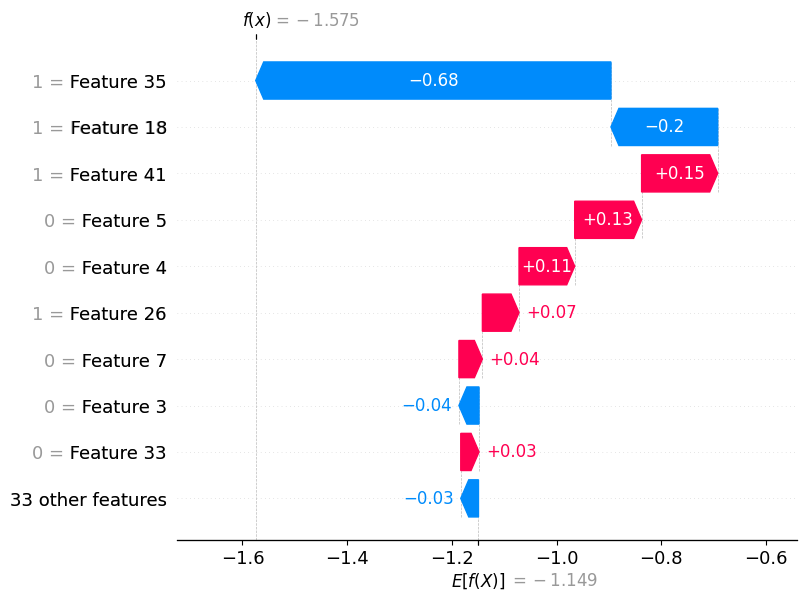

In [6]:
explainer = shap.Explainer(bst)
shap_values = explainer(x_train)
shap.plots.waterfall(shap_values[0])